# Aufgabe 1: Separierbare FIlter

In [2]:
import numpy as np
import cv2
from matplotlib.pyplot import *


In [6]:
m1 = 1/ 3 * np.array([[1, 1, 1]]).T
m2 = np.transpose(m1)

M = m1 * m2
print('m1 * m2 = \n', M)
M = m2 * m1
print('\nm2 * m1 = \n', M)

m1 * m2 = 
 [[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]

m2 * m1 = 
 [[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


# Aufgabe 2: Medianfilter ist Shiftinvariant

error: OpenCV(3.4.2) C:\Miniconda3\conda-bld\opencv-suite_1534379934306\work\modules\core\src\matrix.cpp:755: error: (-215:Assertion failed) dims <= 2 && step[0] > 0 in function 'cv::Mat::locateROI'


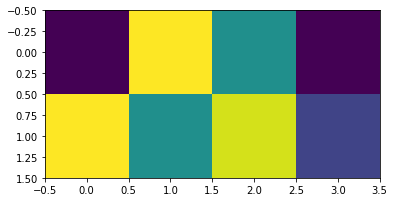

In [7]:
img = cv2.imread("images/cameraman.jpg")
padded = cv2.copyMakeBorder(img, 1, 1, 2, 2, cv2.BORDER_CONSTANT, value=0)
imshow(padded)
kernel = np.ones((5,5),np.float32)/25
output = cv2.filter2D(img, -1, kernel)
imshow(output)

subplot(1, 2, 1) ,imshow(img)
subplot(1, 2, 2) ,imshow(output)
show()

Bei aufgabe 2 ist einiges noch unklar, einige Befehle lassen sich so nicht ohne weiteres übersetzen. Was sollten die Befehle genau machen?


# Aufgabe 3: Laplace-Filter

Schärfen Sie das Bild lena.tif (auf ILIAS) mit Hilfe des Laplace-Filters. Diese Operation wird heutzutage auf den meisten modernen Kameras automatisch durchgeführt.
Ergänzen Sie dazu das folgende MATLAB/Octave File:

In [ ]:
img = cv2.imread("images/lena_std.tif")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
kernel = np.array([[0,-1,0], [-1,5,-1], [0,-1,0]])
im = cv2.filter2D(img, -1, kernel)
subplot(1, 2, 1), imshow(img)
subplot(1, 2, 2), imshow(im)
show()

# Aufgabe 4: Betrag des Gradienten


Führen Sie mit dem Bild Zebra.png die gleichen Operationen durch wie in der nachfolgenden Bildserie gezeigt. Schreiben Sie alle MATLAB/Octave-Befehle auf und vergleichen Ihr Resultat mit der hier gezeigten Bildserie!

In [3]:
img = cv2.imread("images/Zebra.png", 0)
kernelY = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
kernelX = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

dx = cv2.filter2D(img, cv2.CV_64F, kernelX)
dy = cv2.filter2D(img, cv2.CV_64F, kernelY)

absoluteGradient = np.sqrt(np.add(np.square(dx), np.square(dy)))

subplot(2, 2, 1), imshow(img, cmap = 'gray'), title('original'), xticks([]), yticks([])
subplot(2, 2, 2), imshow(dx, cmap = 'gray'), title('dx'), xticks([]), yticks([])
subplot(2, 2, 3), imshow(dy, cmap = 'gray'), title('dy'), xticks([]), yticks([])
subplot(2, 2, 4), imshow(absoluteGradient, cmap = 'gray'), title('(dx*dx + dy*dy)^1/2'), xticks([]), yticks([])


show()



error: OpenCV(3.4.2) C:\Miniconda3\conda-bld\opencv-suite_1534379934306\work\modules\core\src\matrix.cpp:755: error: (-215:Assertion failed) dims <= 2 && step[0] > 0 in function 'cv::Mat::locateROI'


# Aufgabe 5: Gauss- und Laplacepyramide

Erstellen Sie vom Bild der Lena (lena.tif) die Gauss- und die Laplacepyramide. Verwenden Sie dazu die auf ILIAS bereitgestellten MATLAB/Octave-files. Stellen Sie ihr Resultat in der hier gezeigten Form dar.
Kontrollieren Sie dann mit den in MATLAB vorhandenen Befehlen impyramid und imresize ihr Resultat. Siehe auch https://ch.mathworks.com/help/images/ref/impyramid.html

In [ ]:
img = cv2.imread('images/lena_std.tif')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

level0 = img
level1 = cv2.pyrDown(level0)
level2 = cv2.pyrDown(level1)
level3 = cv2.pyrDown(level2)

laplacian0 = cv2.subtract(level0, cv2.pyrUp(level1))
laplacian1 = cv2.subtract(level1, cv2.pyrUp(level2))
laplacian2 = cv2.subtract(level2, cv2.pyrUp(level3))

subplot(1, 3, 1), imshow(level0), title('level0'), xticks([]), yticks([])
subplot(1, 3, 2), imshow(level1), title('level1'), xticks([]), yticks([])
subplot(1, 3, 3), imshow(level2), title('level2'), xticks([]), yticks([])
show()

subplot(1, 3, 1), imshow(4 * laplacian0), title('laplacian0'), xticks([]), yticks([])
subplot(1, 3, 2), imshow(4 * laplacian1), title('laplacian1'), xticks([]), yticks([])
subplot(1, 3, 3), imshow(4 * laplacian2), title('laplacian2'), xticks([]), yticks([])
show()

The level 0 image can now be reconstructed using the lower resolution image and the laplacian:

In [ ]:
combined2 = cv2.add(laplacian2, cv2.pyrUp(level3))
combined1 = cv2.add(laplacian1, cv2.pyrUp(level2))
combined0 = cv2.add(laplacian0, cv2.pyrUp(level1))

subplot(1, 3, 1), imshow(combined0), title('combined0'), xticks([]), yticks([])
subplot(1, 3, 2), imshow(combined1), title('combined1'), xticks([]), yticks([])
subplot(1, 3, 3), imshow(combined2), title('combined2'), xticks([]), yticks([])
show()

# Anhang

Das folgende Pythonscript zeigt, wie die Bilder einer Orange und eines Apfels verschmolzen werden können zu einem "Orphel" bzw. zu einer "Apfange". Trivialerweise könnte man einfach je eine Hälfte der Frucht behalten und daraus die kombinierte Frucht erzeugen. Mit Hilfe der Imagepyramiden der beiden Früchte wird der scharfe Übergang aber aufgeweicht und es entsteht eine "natürlichere" Frucht.

Aufgaben:

1. Zeigen Sie die beiden Früchte
2. Zeigen Sie für beide Früchte jeweils die Gauss'sche wie auch die Laplace'sche Bildpyramide
3. Studieren Sie das Kommando zip und erklären Sie es, insbesondere auch im Zusammenhang mit der Anwendung im Script
4. Zeigen Sie die rekonstruierte Pyramide

Ziel ist es, dass Sie das folgende Script vollständig verstehen und für Ihre eigenen Anwendungen anpassen können.

In [ ]:
import cv2
import numpy as np,sys

A = cv2.imread('../Filtering_Correlation_Convolution/figs/apple.jpg')
B = cv2.imread('../Filtering_Correlation_Convolution/figs/orange.jpg')

# generate Gaussian pyramid for A
G = A.copy()
GaussPyramid_A = [G]
for i in np.arange(6):
    G = cv2.pyrDown(G)
    GaussPyramid_A.append(G)

# generate Gaussian pyramid for B
G = B.copy()
GaussPyramid_B = [G]
for i in np.arange(6):
    G = cv2.pyrDown(G)
    GaussPyramid_B.append(G)

# generate Laplacian Pyramid for A
LaplacePyramid_A = [gpA[5]]
for i in np.arange(5,0,-1):
    GE = cv2.pyrUp(gpA[i])
    L = cv2.subtract(gpA[i-1],GE)
    LaplacePyramid_A.append(L)

# generate Laplacian Pyramid for B
LaplacePyramid_B = [gpB[5]]
for i in np.arange(5,0,-1):
    GE = cv2.pyrUp(gpB[i])
    L = cv2.subtract(gpB[i-1],GE)
    LaplacePyramid_B.append(L)

# Now add left and right halves of images in each level
LS = []
for Laplace_A,Laplace_B in zip(LaplacePyramid_A,LaplacePyramid_B):
    rows,cols,dpt = Laplace_A.shape
    ls = np.hstack((Laplace_A[:,0:cols//2], Laplace_B[:,cols//2:]))
    LS.append(ls)

# now reconstruct
ls_ = LS[0]
for i in np.arange(1,6):
    ls_ = cv2.pyrUp(ls_)
    ls_ = cv2.add(ls_, LS[i])

# image with direct connecting each half
real = np.hstack((A[:,:cols//2],B[:,cols//2:]))

cv2.imwrite('Pyramid_blending2.jpg',ls_)
cv2.imwrite('Direct_blending.jpg',real)